# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# OSEMN Model
1. **OBTAIN:**
    - **Import data, inspect, check for datatypes to convert and null values**<br>
        - Display header and info
        - Drop any unneeded columns (df.drop(['col1','col2'],axis=1)

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
        - [x] Check for #'s that are store as objects (df.info())
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted
            - Decide how to deal weird/null values (df.unique(), df.isna().sum(), df.describe()-min/max, etc
        - [x]  Check for categorical variables stored as integers
    - [x] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [x] Check for multicollinearity
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and dat transformations to perform
        - Can also do kernel density estimates
    - [ ] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
        - categoricals will look like vertical lines
    - [ ] Use pd.plotting.scatter_matrix to visualize possible relationships
    - [ ] Check for linearity

   
4. **FIT AN INITIAL MODEL:** 
    - Various forms, detail later...
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
5. **Revise the fitted model**
    - Multicollinearity is big issue for lin regression and cannot fully remove it
    - Use the predictive ability of model to test it (like R2 and RMSE)
    - Check for missed non-linearity
6. **Holdout validation / Train/test split**
    - use sklearn train_test_split 
___

In [1]:
from bs_ds.bamboo import *
# import bs_ds as bs

View our documentation at https://bs-ds.readthedocs.io/en/latest/bs_ds.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



In [2]:
big_pandas()
ignore_warnings()

display.max_columns=None
display.expand_frame_repr=False
display.max_rows=None
display.precision=4


# Iowa Prisoner Recidivism Data

- Source: https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- **Statistics about recidivism in prisoners from a 3 year prisoner**
- **Target:**
    - Recidivism - Return to Prison
- **Features:**
    - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population

**From Kaggle Listing:**
>For recidivism prediction the full dataset containing 26021 records was used. The name of the data set is: "3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated". All the variables related to recidivism were excluded from the dataset, except the response variable: 'Recidivism - return to prison'. The response variable was turned into a numeric vector of (0,1), where 1 means 'yes recidivism' and 0 means 'no recidivism'. 
Other variables related to recidivism were of course not used in the predictive analysis. There are 26021 records in this dataset.

> Another dataset was constructed using the initial one. This dataset is called 'prison_recidivists_with_recidivism_type_only'. It contains the records of those recidivists from the initial file for whom the type of recidivism has been recorded and documented.

> This one done in order to enable the comparison between the seriousness of the initial offense and the type of recidivism. Therefore, only the records containing both types were left in this dataset, and the rest were filtered out. The second dataset containing data recidivists only is comprised of 6718 records.

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/districtmap09122014.jpg" width=800>

### **The variables in the data set:**

- Fiscal Year Released Fiscal year (year ending June 30) for which the offender was released from prison.

- Recidivism Reporting Year 
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- Race - Ethnicity 
    - Offender's Race and Ethnicity

- Convicting Offense Classification 
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- Convicting Offense Type General category for the most serious offense for which the offender was placed in prison.

- Convicting Offense Subtype 
    - Further classification of the most serious offense for which the offender was placed in prison.

- Release Type 
    - Reasoning for Offender's release from prison.

- Main Supervising District 
    - The Judicial District supervising the offender for the longest time during the tracking period.

- Recidivism - Return to Prison 
    - No = No Recidivism; Yes = Prison admission for any reason within the 3-year tracking period

- Days to Recidivism 
    - Number of days it took before the offender returned to prison.

- New Conviction Offense Classification The same as the initial offense classification.

- New Conviction Offense Type The same as the initial offense type.

- New Conviction Offense Sub Type The same as the initial offense subtype.

- Part of Target Population 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
    ___

In [3]:
# Importing custom-library of functions.
# from bs_ds.bamboo import *
import bs_ds
from bs_ds.imports import *

,Module/Package Handle
pandas,pd
numpy,np
matplotlib,mpl
matplotlib.pyplot,plt
seaborn,sns


## Loading in the Dataset

In [4]:
# Dataset Links
# all_prisoners_url = 'https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/dataset/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv'
all_prisoners_file = "datasets/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv"
full_all_prisoners_file = "datasets/FULL_3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv"
# only_repeat_criminals_w_new_crime_url = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/dataset/prison_recidivists_with_recidivism_type_only.csv"
only_repeat_criminals_w_new_crime_file= "datasets/prison_recidivists_with_recidivism_type_only.csv"

In [5]:
# Will be using the all_prisoners file to predict recidivism
df = pd.read_csv(full_all_prisoners_file)

In [6]:
from bs_ds.bamboo import inspect_df, check_null, check_unique, check_column, check_numeric
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 17 columns):
Fiscal Year Released                     26020 non-null int64
Recidivism Reporting Year                26020 non-null int64
Race - Ethnicity                         25990 non-null object
Age At Release                           26017 non-null object
Convicting Offense Classification        26020 non-null object
Convicting Offense Type                  26020 non-null object
Convicting Offense Subtype               26020 non-null object
Release Type                             24258 non-null object
Main Supervising District                16439 non-null object
Recidivism - Return to Prison            26020 non-null object
Days to Recidivism                       8681 non-null float64
New Conviction Offense Classification    6718 non-null object
New Conviction Offense Type              6718 non-null object
New Conviction Offense Sub Type          6699 non-null object
Part of Target

None

,Fiscal Year Released,Recidivism Reporting Year,Days to Recidivism
count,26020.0000,26020.0000,8681.0000
mean,2012.6008,2015.6008,469.9315
std,1.6610,1.6610,282.3034
min,2010.0000,2013.0000,0.0000
25%,2011.0000,2014.0000,238.0000
50%,2013.0000,2016.0000,418.0000
75%,2014.0000,2017.0000,682.0000
max,2015.0000,2018.0000,1095.0000



---------------------------------------------------

# of Identified Numeric Values in "Object" columns:



,Numeric values,Total Values,Percent
Column,,,



----------------------------

# of Identified Null Values:



,Null values,Total Values,Percent
Column,,,
Fiscal Year Released,0,26020,0.000
Recidivism Reporting Year,0,26020,0.000
Race - Ethnicity,30,26020,0.115
Age At Release,3,26020,0.012
Convicting Offense Classification,0,26020,0.000
Convicting Offense Type,0,26020,0.000
Convicting Offense Subtype,0,26020,0.000
Release Type,1762,26020,6.772
Main Supervising District,9581,26020,36.822


,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Main Supervising District,Recidivism - Return to Prison,Days to Recidivism,New Conviction Offense Classification,New Conviction Offense Type,New Conviction Offense Sub Type,Part of Target Population,Recidivism Type,Sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,433.0,C Felony,Drug,Trafficking,Yes,New,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,453.0,NaN,NaN,NaN,No,Tech,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,832.0,NaN,NaN,NaN,Yes,Tech,Male


**Any columns that are about New Convictions or days to recidivism should be dropped for our initial model predicting recidivism.**
- "New..", "Days to Recividism"

In [7]:
from bs_ds.bamboo import drop_cols
df = drop_cols(df, ['New','Days','Recidivism Type'])

Removed New.
Removed Days.
Removed Recidivism Type.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
Fiscal Year Released                 26020 non-null int64
Recidivism Reporting Year            26020 non-null int64
Race - Ethnicity                     25990 non-null object
Age At Release                       26017 non-null object
Convicting Offense Classification    26020 non-null object
Convicting Offense Type              26020 non-null object
Convicting Offense Subtype           26020 non-null object
Release Type                         24258 non-null object
Main Supervising District            16439 non-null object
Recidivism - Return to Prison        26020 non-null object
Part of Target Population            26020 non-null object
Sex                                  26017 non-null object
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


In [9]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
Fiscal Year Released                 26020 non-null int64
Recidivism Reporting Year            26020 non-null int64
Race - Ethnicity                     25990 non-null object
Age At Release                       26017 non-null object
Convicting Offense Classification    26020 non-null object
Convicting Offense Type              26020 non-null object
Convicting Offense Subtype           26020 non-null object
Release Type                         24258 non-null object
Main Supervising District            16439 non-null object
Recidivism - Return to Prison        26020 non-null object
Part of Target Population            26020 non-null object
Sex                                  26017 non-null object
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


None

,Fiscal Year Released,Recidivism Reporting Year
count,26020.0000,26020.0000
mean,2012.6008,2015.6008
std,1.6610,1.6610
min,2010.0000,2013.0000
25%,2011.0000,2014.0000
50%,2013.0000,2016.0000
75%,2014.0000,2017.0000
max,2015.0000,2018.0000



---------------------------------------------------

# of Identified Numeric Values in "Object" columns:



,Numeric values,Total Values,Percent
Column,,,



----------------------------

# of Identified Null Values:



,Null values,Total Values,Percent
Column,,,
Fiscal Year Released,0,26020,0.000
Recidivism Reporting Year,0,26020,0.000
Race - Ethnicity,30,26020,0.115
Age At Release,3,26020,0.012
Convicting Offense Classification,0,26020,0.000
Convicting Offense Type,0,26020,0.000
Convicting Offense Subtype,0,26020,0.000
Release Type,1762,26020,6.772
Main Supervising District,9581,26020,36.822


,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Main Supervising District,Recidivism - Return to Prison,Part of Target Population,Sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male


### Save original names vs short names in column_legend
- then map names onto columns

In [10]:
colnames_orig = df.columns
colnames_orig

Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release ', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype', 'Release Type',
       'Main Supervising District', 'Recidivism - Return to Prison',
       'Part of Target Population', 'Sex'],
      dtype='object')

In [11]:
colnames_short = ('yr_released','report_year','race_ethnicity','age_released','crime_class','crime_type','crime_subtype','release_type','super_dist','recidivist','target_pop','sex')

column_legend = dict(zip(colnames_orig,colnames_short))
column_legend

{'Fiscal Year Released': 'yr_released',
 'Recidivism Reporting Year': 'report_year',
 'Race - Ethnicity': 'race_ethnicity',
 'Age At Release ': 'age_released',
 'Convicting Offense Classification': 'crime_class',
 'Convicting Offense Type': 'crime_type',
 'Convicting Offense Subtype': 'crime_subtype',
 'Release Type': 'release_type',
 'Main Supervising District': 'super_dist',
 'Recidivism - Return to Prison': 'recidivist',
 'Part of Target Population': 'target_pop',
 'Sex': 'sex'}

In [12]:
# Rename df with shorter names
df.rename(mapper=column_legend,axis=1,inplace=True)
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


### Investigating Values for Each Object Column and Determining How to Handle

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
yr_released       26020 non-null int64
report_year       26020 non-null int64
race_ethnicity    25990 non-null object
age_released      26017 non-null object
crime_class       26020 non-null object
crime_type        26020 non-null object
crime_subtype     26020 non-null object
release_type      24258 non-null object
super_dist        16439 non-null object
recidivist        26020 non-null object
target_pop        26020 non-null object
sex               26017 non-null object
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


## ADDRESSING NULL VALUES
### Checking Null Values


In [14]:
check_null(df)


----------------------------

# of Identified Null Values:



,Null values,Total Values,Percent
Column,,,
yr_released,0,26020,0.000
report_year,0,26020,0.000
race_ethnicity,30,26020,0.115
age_released,3,26020,0.012
crime_class,0,26020,0.000
crime_type,0,26020,0.000
crime_subtype,0,26020,0.000
release_type,1762,26020,6.772
super_dist,9581,26020,36.822


**Results of Null Check**
- race_ethnicity has 30 (0.12% of data)
    -  drop
- age_at_release has 3 (0.01% of data)
    - drop
- sex has 3 (0.01% of data)
    - drop
- super_district has 9581(36.82% of data)
    - replace
    - with...
- release_type has 1762 (6.77% of data)
    - replace
    - with
- part_target_pop has 1762 (6.77% of data)
    - replace
    - with...
    
### Checking Columns with Nulls to Replace to Decide Method

In [15]:
# Dropping null values from 'age_at_release','race_ethnicity'
df.dropna(subset=['age_released','race_ethnicity','sex'],inplace=True)

In [16]:
check_null(df)


----------------------------

# of Identified Null Values:



,Null values,Total Values,Percent
Column,,,
yr_released,0,25987,0.000
report_year,0,25987,0.000
race_ethnicity,0,25987,0.000
age_released,0,25987,0.000
crime_class,0,25987,0.000
crime_type,0,25987,0.000
crime_subtype,0,25987,0.000
release_type,1762,25987,6.780
super_dist,9549,25987,36.745


**Results of Null Check**
- super_district has 9549(36.75% of data)
    - replace
    - with 'unknown'
- release_type has 1762 (6.78% of data)
    - replace  (_could_ consider dropping)
    - with 'unknown'    

In [17]:
check_unique(df, columns=['super_dist','release_type']) #,'target_pop','crime_type','crime_class'])


super_dist Type: object
Number unique values: 10


,super_dist
5JD,4982
1JD,2787
2JD,1988
8JD,1556
7JD,1514
3JD,1188
6JD,1098
4JD,666
ISC,350
Interstate Compact,309



release_type Type: object
Number unique values: 11


,release_type
Parole,9810
Parole Granted,5577
Discharged – End of Sentence,5007
Discharged - Expiration of Sentence,2335
Released to Special Sentence,401
Special Sentence,347
Paroled w/Immediate Discharge,334
Paroled to Detainer - Out of State,137
Paroled to Detainer - INS,134
Paroled to Detainer - U.S. Marshall,77


In [18]:
# Filling NA's in super_dist and release_type
df.fillna("unknown",inplace=True)

check_null(df)


----------------------------

# of Identified Null Values:



,Null values,Total Values,Percent
Column,,,
yr_released,0,25987,0.0
report_year,0,25987,0.0
race_ethnicity,0,25987,0.0
age_released,0,25987,0.0
crime_class,0,25987,0.0
crime_type,0,25987,0.0
crime_subtype,0,25987,0.0
release_type,0,25987,0.0
super_dist,0,25987,0.0


## Determining how to handle/encode features

In [19]:
check_unique(df,['crime_class'])


crime_class Type: object
Number unique values: 15


,crime_class
D Felony,10478
C Felony,6796
Aggravated Misdemeanor,4916
B Felony,1763
Felony - Enhancement to Original Penalty,1532
Felony - Enhanced,220
Serious Misdemeanor,155
Special Sentence 2005,98
Felony - Mandatory Minimum,11
Other Felony,6


#### Notes on columns
- Numeric:
    - yr_release
    - recid_report_yr
- Ordinal:
    - age_at_release should be an ordinal label.
- All others should be LabelEncoded
    - class_of_crime
    - crime_type
    - crime_subtype
    - super_district
    - release_type
    - part_target_pop
    - ~~recidivism~~ (have 'recid_code')

In [20]:
column_legend.values()

dict_values(['yr_released', 'report_year', 'race_ethnicity', 'age_released', 'crime_class', 'crime_type', 'crime_subtype', 'release_type', 'super_dist', 'recidivist', 'target_pop', 'sex'])

### Lists of Vars to encode

In [21]:
# Defining lists to use later.
vars_label_encode = ['race_ethnicity','crime_class','crime_type', 'crime_subtype', 'super_dist', 'release_type', 'target_pop', 'sex','age_released','recidivist']
# vars_ord_encode = ['age_released']

### Converting categorical variables to category type before encoding
~~Encoding age_at_release as Ordinal~~

In [22]:
check_unique(df,['recidivist'])


recidivist Type: object
Number unique values: 2


,recidivist
No,17306
Yes,8681


In [23]:
df['recidivist']=df['recidivist'].map({'No':0,'Yes':1});

In [24]:
check_unique(df,['recidivist'])


recidivist Type: int64
Number unique values: 2


,recidivist
0,17306
1,8681


In [25]:
for col in vars_label_encode:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25987 entries, 0 to 26019
Data columns (total 12 columns):
yr_released       25987 non-null int64
report_year       25987 non-null int64
race_ethnicity    25987 non-null category
age_released      25987 non-null category
crime_class       25987 non-null category
crime_type        25987 non-null category
crime_subtype     25987 non-null category
release_type      25987 non-null category
super_dist        25987 non-null category
recidivist        25987 non-null category
target_pop        25987 non-null category
sex               25987 non-null category
dtypes: category(10), int64(2)
memory usage: 866.9 KB


#### Encoding age_at_release by mapping a dictionary onto the columns instead.

In [26]:
# Ordering age categories in a tuple and then turning into an array.
cat_codes = ('Under 25','25-34', '35-44','45-54','55 and Older')
cat_codes = np.array(cat_codes)
cat_codes
# Defining age range tuple
age_range = tuple(cat_codes)
age_range

('Under 25', '25-34', '35-44', '45-54', '55 and Older')

In [27]:
# Defining age_code type
age_codes = (0,1,2,3,4)

# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_range,age_codes))
age_map

{'Under 25': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55 and Older': 4}

In [28]:
# df_code['age_code'] = df_code['age_at_release'].map(age_map)
# # check_unique(df_code,['age_at_release','age_code']) #df_code['age_code'].value_counts()
# df_code.drop('age_at_release',axis=1,inplace=True)

# EDA

### Encoding categorical columns using LabelLibrary()


In [29]:
from bs_ds.bamboo import LabelLibrary
lablib = LabelLibrary()
df_code = lablib.fit_transform(df,vars_label_encode)

df_code.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,6,0,3,4,16,2,6,1,1,1
1,2010,2013,10,0,4,2,21,1,10,1,0,1
2,2010,2013,10,1,2,0,23,2,4,1,1,1
3,2010,2013,10,0,2,1,11,2,5,0,1,1
4,2010,2013,6,1,4,4,3,1,10,1,0,1


In [30]:
df_code.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25987 entries, 0 to 26019
Data columns (total 12 columns):
yr_released       25987 non-null int64
report_year       25987 non-null int64
race_ethnicity    25987 non-null int32
age_released      25987 non-null int32
crime_class       25987 non-null int32
crime_type        25987 non-null int32
crime_subtype     25987 non-null int32
release_type      25987 non-null int32
super_dist        25987 non-null int32
recidivist        25987 non-null int64
target_pop        25987 non-null int32
sex               25987 non-null int32
dtypes: int32(9), int64(3)
memory usage: 1.7 MB


(<Figure size 864x648 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD03135BE0>,
       dtype=object))

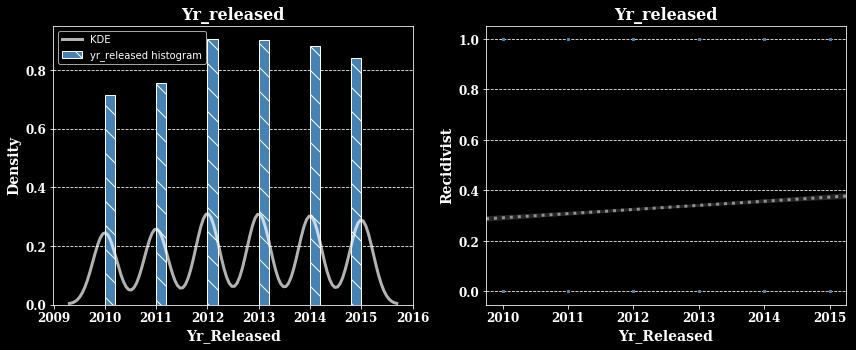

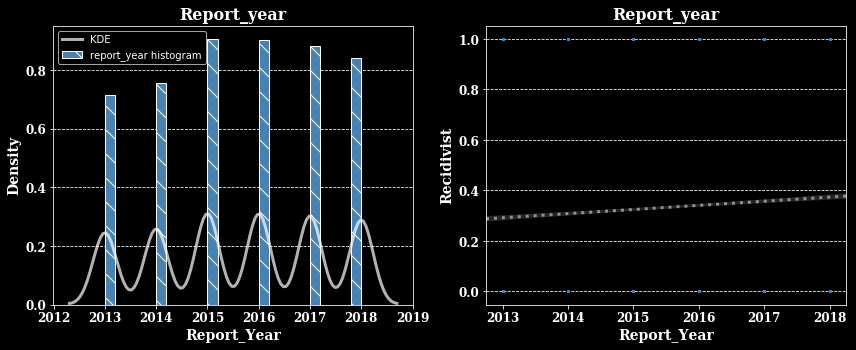

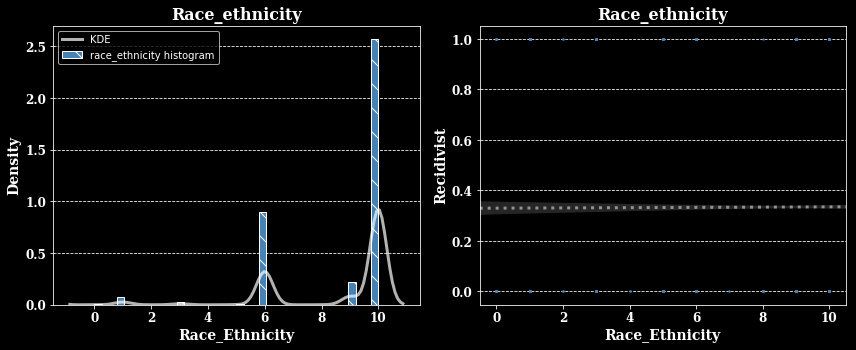

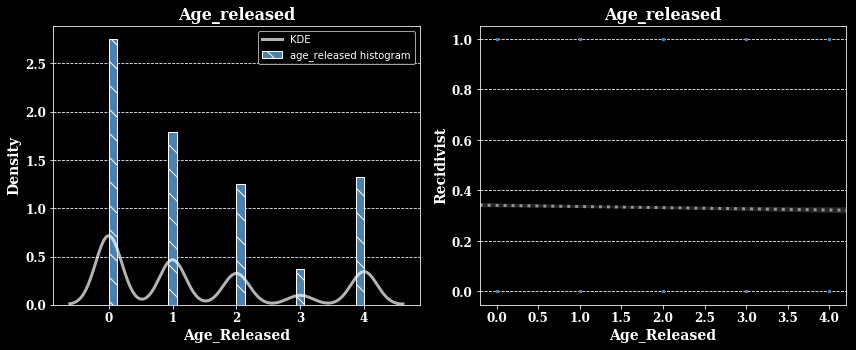

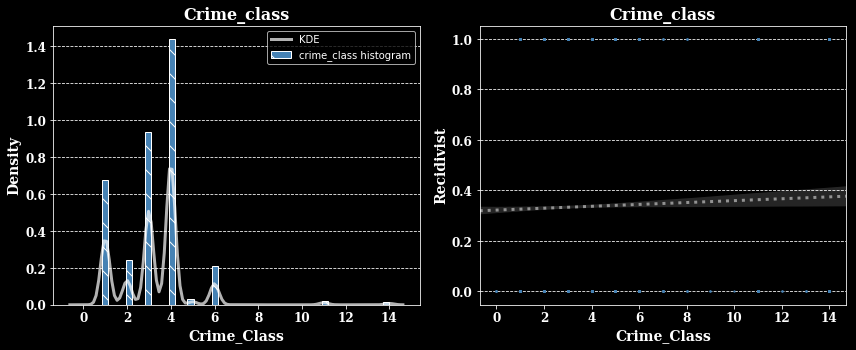

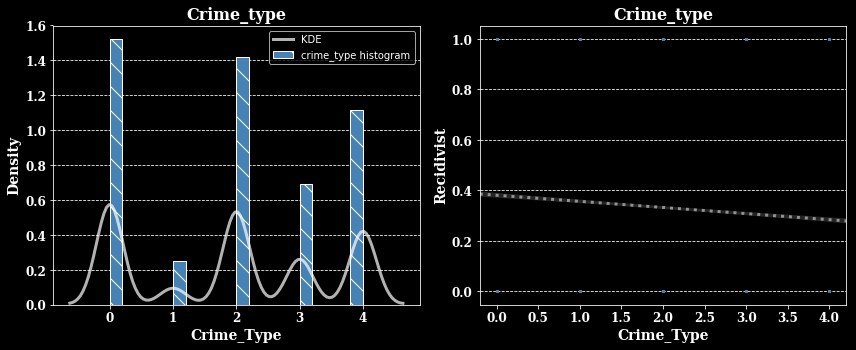

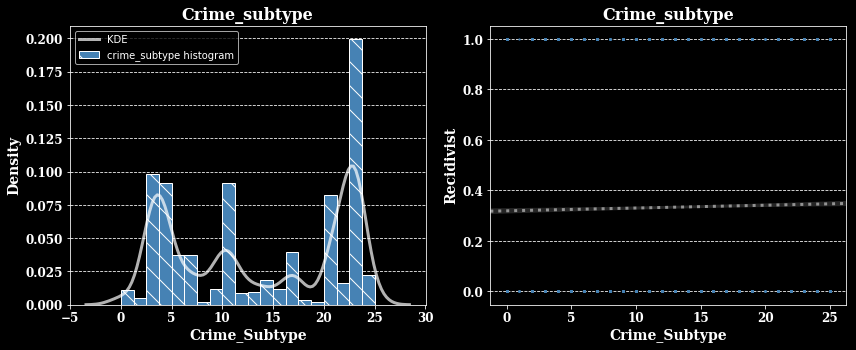

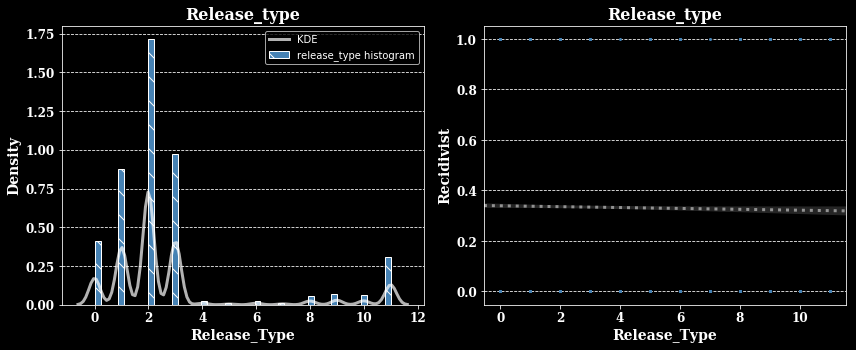

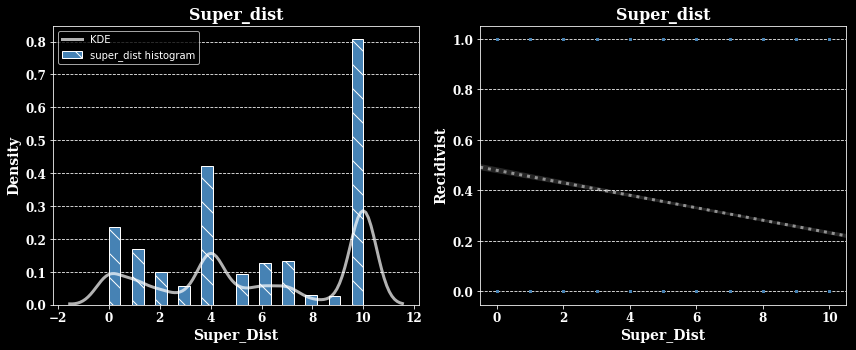

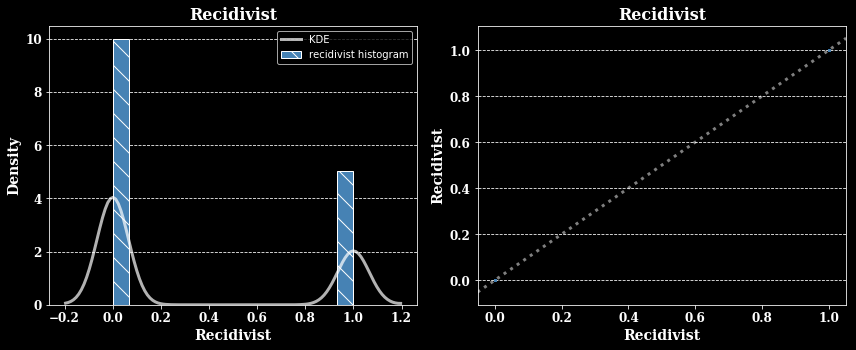

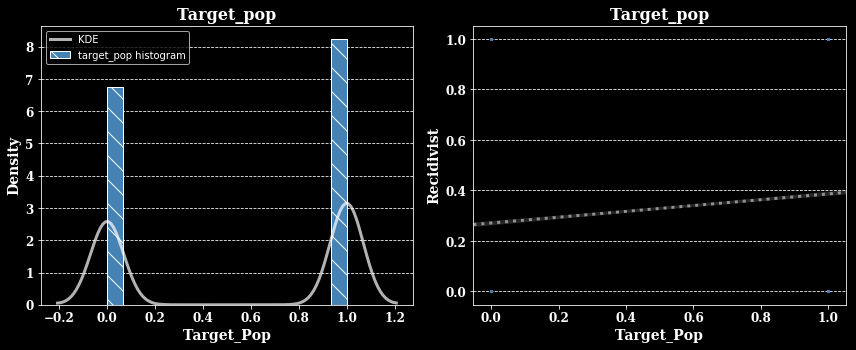

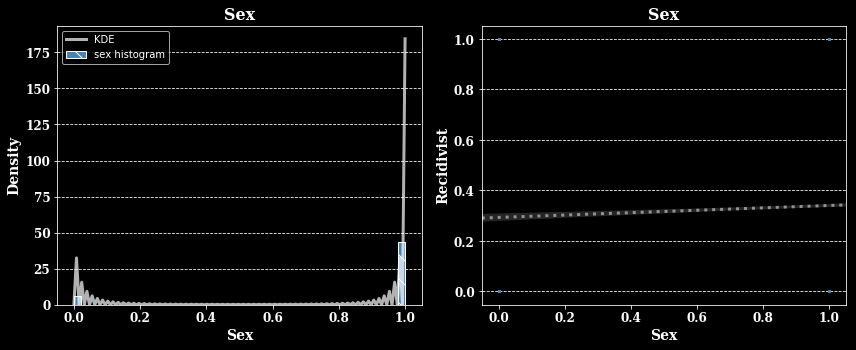

In [31]:
from bs_ds.bamboo import plot_hist_scat
plot_hist_scat(df_code,'recidivist')

(<Figure size 1152x1152 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dd03c9f208>)

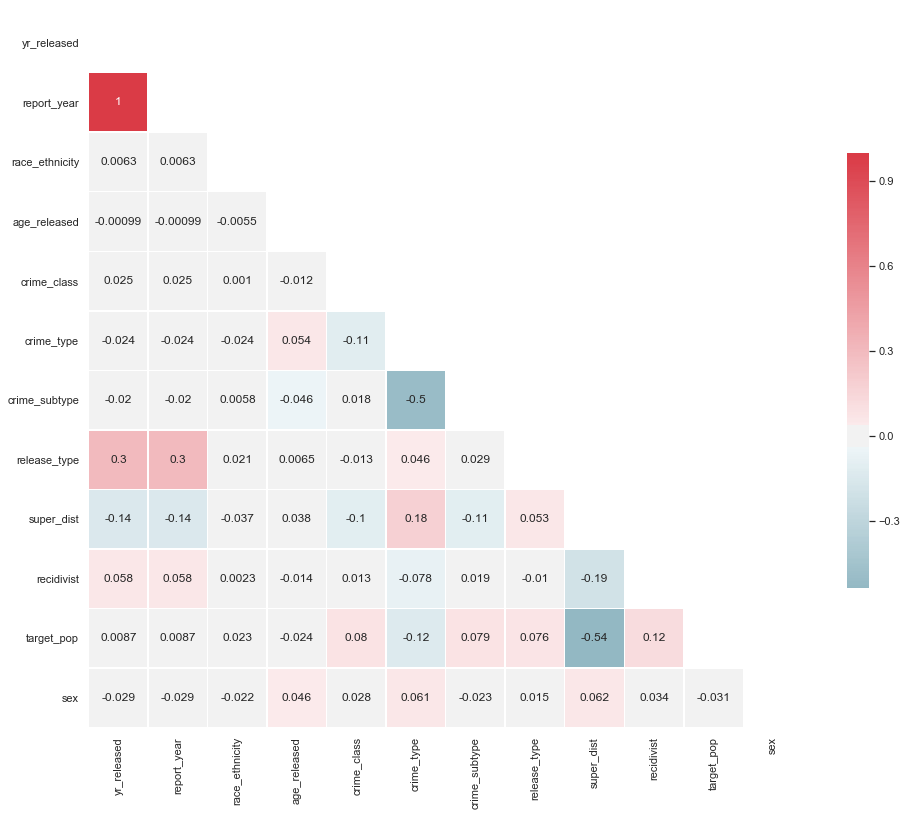

In [32]:
from bs_ds.bamboo import multiplot
multiplot(df_code)

## Comments on Data 

- Everything looks good to go with the possible exception of recivisidm_year. 
- Keeping for now. 

# Preprocessing for Modeling

In [33]:
X = pd.get_dummies(df.drop('recidivist',axis=1))
y = df.recidivist

In [34]:
# # X.to_csv('X_one_hot_05072019_0815pm.csv')
# X = pd.read_csv('X_one_hot_05072019_0815pm.csv')
# y= pd.read_csv('y_recidivist.csv')

In [35]:
# y.to_csv('y_recidivist.csv')

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25987 entries, 0 to 26019
Data columns (total 91 columns):
yr_released                                                       25987 non-null int64
report_year                                                       25987 non-null int64
race_ethnicity_American Indian or Alaska Native - Hispanic        25987 non-null uint8
race_ethnicity_American Indian or Alaska Native - Non-Hispanic    25987 non-null uint8
race_ethnicity_Asian or Pacific Islander - Hispanic               25987 non-null uint8
race_ethnicity_Asian or Pacific Islander - Non-Hispanic           25987 non-null uint8
race_ethnicity_Black -                                            25987 non-null uint8
race_ethnicity_Black - Hispanic                                   25987 non-null uint8
race_ethnicity_Black - Non-Hispanic                               25987 non-null uint8
race_ethnicity_N/A -                                              25987 non-null uint8
race_ethnicity_White 

In [37]:
from bs_ds.bs_ds import scale_data, thick_pipe, compare_pipes, make_config_dict,make_random_config_dict

## Using bs_ds.bs_ds.thick_pipe 
1. Try scaling the features with different scalers for improves results
2. Use highest score to determine which models to try first.
2B. Test parameters compare_pipes using search = 'random', get best estimators from it
- When find the best parameters, use those to zero in on a smaller range to test again with compare pipes with smaller ranges of parameters
- Some of the models that are more computatinally intensive that may want to be tested in small batches or 1 at a time:
    - LogRegCV, XGB, GradBoost, AdaBoost

In [44]:
df_hot = pd.get_dummies(df.drop(['recidivist','yr_released','report_year'],axis=1))

In [46]:
X = df_hot
y = df_code['recidivist']

In [48]:
pipe_res = thick_pipe(X,y,verbose=False);

,classifier,score
0,LogReg,0.6779
1,SVC,0.6698
2,DecTree,0.6318
3,RandFor,0.6391
4,AdaBoost,0.6697
5,GradBoost,0.6780
6,xgb,0.6782


- Notes on thick pipe run # 1(ish)
    - Very similar results for most models(except dectree, randomfor)
    - Best score is 0.0.68 gradboost
- Notes on run # 2 (one-hot encoded everything but years and target)
    - Basically same performance, but xgb eeks out .6782
    
| ---- | ---- | ---- |
|0	LogReg: 0.6779|,1	SVC:	0.6698, 2	DecTree:	0.6318, 3	RandFor:	0.6391, 4	AdaBoost:	0.6697, 5	GradBoost:	0.6780, 6	xgb	0.6782

In [ ]:
X.info()

In [41]:
#df=[] # freeing up memory 
for col in vars_label_encode:
    df_code[col] = df_code[col].astype('category')
df_code.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25987 entries, 0 to 26019
Data columns (total 12 columns):
yr_released       25987 non-null int64
report_year       25987 non-null int64
race_ethnicity    25987 non-null category
age_released      25987 non-null category
crime_class       25987 non-null category
crime_type        25987 non-null category
crime_subtype     25987 non-null category
release_type      25987 non-null category
super_dist        25987 non-null category
recidivist        25987 non-null category
target_pop        25987 non-null category
sex               25987 non-null category
dtypes: category(10), int64(2)
memory usage: 866.9 KB


In [45]:
df_hot.head()

,race_ethnicity_American Indian or Alaska Native - Hispanic,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black -,race_ethnicity_Black - Hispanic,race_ethnicity_Black - Non-Hispanic,race_ethnicity_N/A -,race_ethnicity_White -,race_ethnicity_White - Hispanic,race_ethnicity_White - Non-Hispanic,age_released_25-34,age_released_35-44,age_released_45-54,age_released_55 and Older,age_released_Under 25,crime_class_A Felony,crime_class_Aggravated Misdemeanor,crime_class_B Felony,crime_class_C Felony,crime_class_D Felony,crime_class_Felony - Enhanced,crime_class_Felony - Enhancement to Original Penalty,crime_class_Felony - Mandatory Minimum,crime_class_Other Felony,crime_class_Other Felony (Old Code),crime_class_Other Misdemeanor,crime_class_Serious Misdemeanor,crime_class_Sexual Predator Community Supervision,crime_class_Simple Misdemeanor,crime_class_Special Sentence 2005,crime_type_Drug,crime_type_Other,crime_type_Property,crime_type_Public Order,crime_type_Violent,crime_subtype_Alcohol,crime_subtype_Animals,crime_subtype_Arson,crime_subtype_Assault,crime_subtype_Burglary,crime_subtype_Drug Possession,crime_subtype_Flight/Escape,crime_subtype_Forgery/Fraud,crime_subtype_Kidnap,crime_subtype_Murder/Manslaughter,crime_subtype_OWI,crime_subtype_Other Criminal,crime_subtype_Other Drug,crime_subtype_Other Public Order,crime_subtype_Other Violent,crime_subtype_Prostitution/Pimping,crime_subtype_Robbery,crime_subtype_Sex,crime_subtype_Sex Offender Registry/Residency,crime_subtype_Special Sentence Revocation,crime_subtype_Stolen Property,crime_subtype_Theft,crime_subtype_Traffic,crime_subtype_Trafficking,crime_subtype_Vandalism,crime_subtype_Weapons,release_type_Discharged - Expiration of Sentence,release_type_Discharged – End of Sentence,release_type_Parole,release_type_Parole Granted,release_type_Paroled to Detainer - INS,release_type_Paroled to Detainer - Iowa,release_type_Paroled to Detainer - Out of State,release_type_Paroled to Detainer - U.S. Marshall,release_type_Paroled w/Immediate Discharge,release_type_Released to Special Sentence,release_type_Special Sentence,release_type_unknown,super_dist_1JD,super_dist_2JD,super_dist_3JD,super_dist_4JD,super_dist_5JD,super_dist_6JD,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_unknown,target_pop_No,target_pop_Yes,sex_Female,sex_Male
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1


# From prior days:

In [ ]:
stop

## Baseline Classifier


In [ ]:
X.info(), y.dtype

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

In [ ]:
clf_xgb = xgboost.sklearn.XGBClassifier()
clf_gbc = GradientBoostingClassifier()

In [ ]:
stop

In [ ]:
tree_clf.get_params()

In [ ]:
params={'max_depth':10}
tree_clf.set_params(**params)

In [ ]:
tree_clf.fit(X_train, y_train)

In [ ]:
tree_clf.feature_importances_


In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [ ]:
import os
import sys
sys.path.append('C:\\Program\ Files\ \(x86\)\\Graphviz2.38\\bin')

In [ ]:
from bs_ds import *

In [ ]:

viz_tree(tree_clf)


In [ ]:
plot_feature_importances(tree_clf)

### Assessing Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test,pred))

## Bagged Trees

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_depth=5), n_estimators=20)

In [ ]:
bagged_tree.fit(X_train, y_train)

In [ ]:
bagged_tree.score(X_train,y_train)

In [ ]:
y_pred = bagged_tree.predict(X_test)
bagged_tree.score(X_test, y_test)

## Random Forests

In [ ]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

In [ ]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))